In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Nykaa_Products_2023.csv", encoding='utf-8')
df

,Unnamed: 0,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
0,0,L'Oreal Paris Glycolic Bright Serum With Glyco...,( 5109 ),MRP:₹749,₹599,20% Off,NaN
1,1,Nykaa Skin Secrets Gold Sheet Mask + Nykaa Ski...,( 25 ),MRP:₹1099,₹879,20% Off,Extra 10% Off
2,2,Dot & Key Vitamin C + E Face Sunscreen With SP...,( 3606 ),MRP:₹495,₹421,15% Off,Extra 5% Off
3,3,Olay Total Effects 7 In One Anti-Ageing Day Cr...,( 6046 ),MRP:₹798,₹638,20% Off,NaN
4,4,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,( 1421 ),MRP:₹699,₹559,20% Off,NaN
...,...,...,...,...,...,...,...
11995,11995,Amrutam Herbal Ubtan + Face Wash + Ashatagandh...,( 3 ),MRP:,₹2327,NaN,NaN
11996,11996,Alainne Skin Satin Walnut Scrub,NaN,MRP:,₹70,NaN,NaN
11997,11997,Bella Panty Mini Pantyliner + Bella Tampo Supe...,( 4897 ),MRP:₹288,₹253,12% Off,NaN
11998,11998,Superdrug Essential Facial Cleansing Wipes X25...,( 4 ),MRP:₹175,₹140,20% Off,NaN


In [3]:
df['Reviews'] = df['Reviews'].str.extract(r'(\d+)')

df['Original Price'] = df['Original Price'].str.extract(r'₹(\d+)')
df['Offer Price'] = df['Offer Price'].str.extract(r'₹(\d+)')
df['Discount'] = df['Discount'].str.extract(r'(\d+)%')

In [4]:
df.isnull().sum()

Unnamed: 0           0
Product Name         0
Reviews            772
Original Price    2990
Offer Price          0
Discount          3009
Free Gifts        7927
dtype: int64

In [5]:
df.dropna(inplace=True)
df

,Unnamed: 0,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
1,1,Nykaa Skin Secrets Gold Sheet Mask + Nykaa Ski...,25,1099,879,20,Extra 10% Off
2,2,Dot & Key Vitamin C + E Face Sunscreen With SP...,3606,495,421,15,Extra 5% Off
5,5,Biotique Bio Papaya Revitalizing Tan Removal S...,47161,100,82,18,Enjoy Free Gift
6,6,Dr. Sheth's Ceramide & Vitamin C Sunscreen,9803,499,429,14,Enjoy Free Gift
7,7,Lotus Herbals YouthRx Anti-Ageing Transforming...,3583,755,566,25,Extra 5% Off
...,...,...,...,...,...,...,...
11962,11962,"Quench Oil Control Solution Kit, Chialeader Sh...",3,997,897,10,Enjoy Free Gift
11963,11963,The Man Company Chaar-cool Bars (4 Pcs),6,1000,650,35,Enjoy Free Gift
11980,11980,CGG Cosmetics Hydra Bomb Overnight Gel Mask,15,599,419,30,Enjoy Free Gift
11982,11982,"Quench Oil Control Solution Kit, Chialeader Sh...",3,997,897,10,Enjoy Free Gift


In [6]:
df.isnull().sum()

Unnamed: 0        0
Product Name      0
Reviews           0
Original Price    0
Offer Price       0
Discount          0
Free Gifts        0
dtype: int64

In [7]:
df.describe()


,Unnamed: 0
count,2733.000000
mean,5136.972558
std,3363.488528
min,1.000000
25%,2251.000000
50%,4748.000000
75%,7765.000000
max,11983.000000


In [8]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of        Unnamed: 0                                       Product Name Reviews   
1               1  Nykaa Skin Secrets Gold Sheet Mask + Nykaa Ski...      25  \
2               2  Dot & Key Vitamin C + E Face Sunscreen With SP...    3606   
5               5  Biotique Bio Papaya Revitalizing Tan Removal S...   47161   
6               6         Dr. Sheth's Ceramide & Vitamin C Sunscreen    9803   
7               7  Lotus Herbals YouthRx Anti-Ageing Transforming...    3583   
...           ...                                                ...     ...   
11962       11962  Quench Oil Control Solution Kit, Chialeader Sh...       3   
11963       11963            The Man Company Chaar-cool Bars (4 Pcs)       6   
11980       11980        CGG Cosmetics Hydra Bomb Overnight Gel Mask      15   
11982       11982  Quench Oil Control Solution Kit, Chialeader Sh...       3   
11983       11983            The Man Company Chaar-cool Bars (4 Pcs)       6 

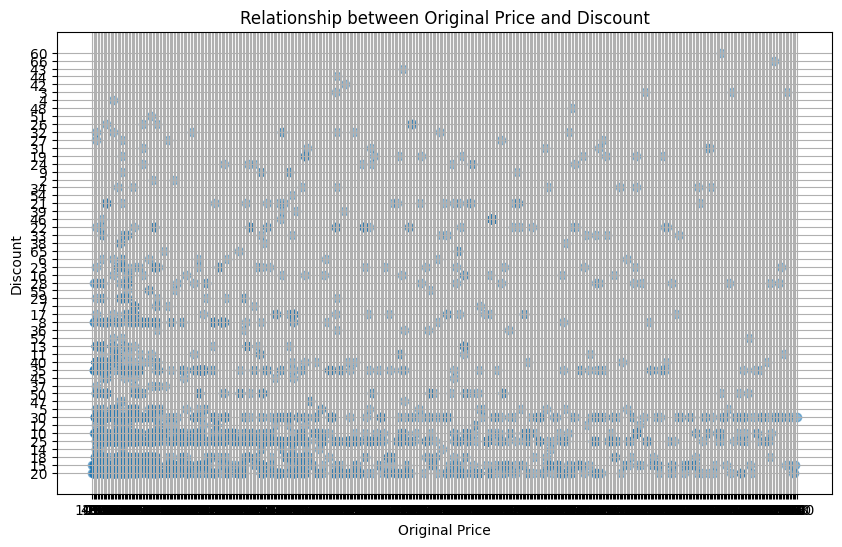

In [9]:
from matplotlib import pyplot as plt

OriginalPrice = df['Original Price']
Discount = df['Discount']

plt.figure(figsize=(10, 6))
plt.scatter(OriginalPrice, Discount, alpha=0.5)
plt.title('Relationship between Original Price and Discount')
plt.xlabel('Original Price')
plt.ylabel('Discount')
plt.grid(True)
plt.show()


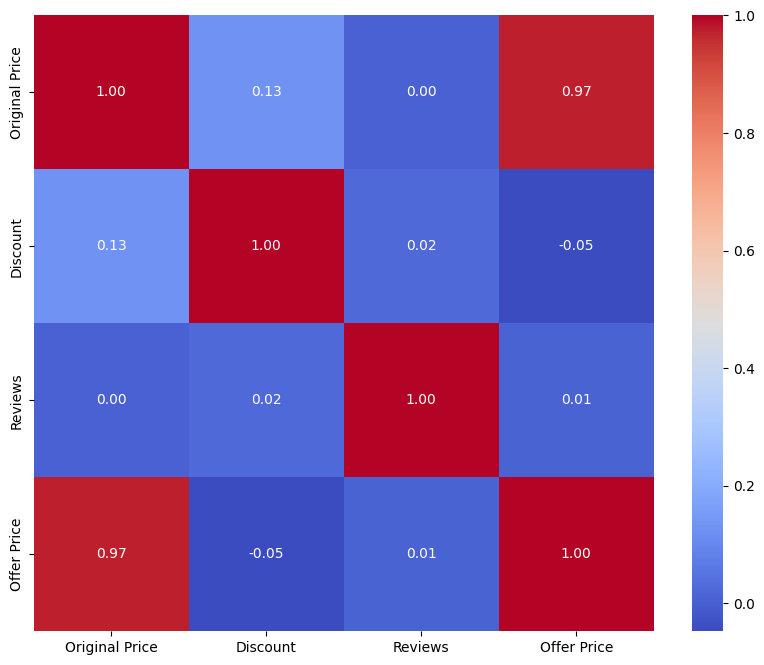

In [10]:
import seaborn as sns


plt.figure(figsize=(10, 8))
sns.heatmap(df[['Original Price', 'Discount','Reviews','Offer Price']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


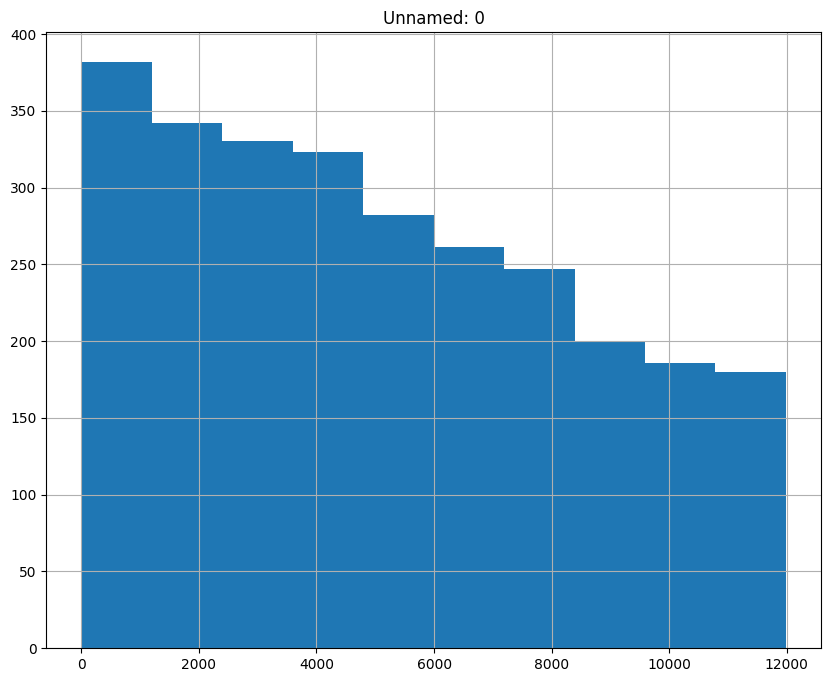

In [11]:
df.hist(figsize=(10, 8))
plt.show()


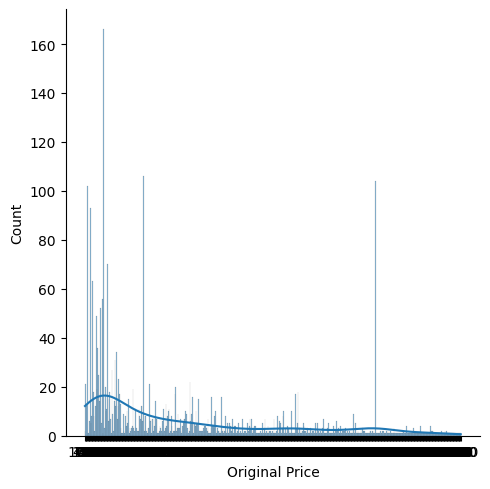

In [12]:
sns.displot(df['Original Price'], kde=True)
plt.show()


In [13]:
categories = {
    'Skin Care': ['Serum', 'Sunscreen', 'Day Cream', 'Night Cream', 'Moisturizer', 'Face Wash', 'Cleanser', 'Toner', 'Lotion', 'Gel', 'Face Scrub', 'Face Mask', 'Sheet Mask'],
    'Hair Care': ['Shampoo', 'Conditioner', 'Hair Oil', 'Hair Serum'],
    'Makeup': ['Lipstick', 'Foundation', 'Mascara', 'Eyeliner', 'Eyeshadow', 'Blush', 'Bronzer', 'Highlighter', 'Makeup Remover'],
    'Body Care': ['Body Lotion', 'Body Wash', 'Shower Gel', 'Body Scrub'],
    'Personal Care': ['Deodorant', 'Toothpaste', 'Mouthwash', 'Shaving Cream', 'Hand Sanitizer'],
}

def assign_category(product_name):
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in product_name.lower():
                return category
    return 'Other'  


df['Category'] = df['Product Name'].apply(assign_category)


print(df)

       Unnamed: 0                                       Product Name Reviews   
1               1  Nykaa Skin Secrets Gold Sheet Mask + Nykaa Ski...      25  \
2               2  Dot & Key Vitamin C + E Face Sunscreen With SP...    3606   
5               5  Biotique Bio Papaya Revitalizing Tan Removal S...   47161   
6               6         Dr. Sheth's Ceramide & Vitamin C Sunscreen    9803   
7               7  Lotus Herbals YouthRx Anti-Ageing Transforming...    3583   
...           ...                                                ...     ...   
11962       11962  Quench Oil Control Solution Kit, Chialeader Sh...       3   
11963       11963            The Man Company Chaar-cool Bars (4 Pcs)       6   
11980       11980        CGG Cosmetics Hydra Bomb Overnight Gel Mask      15   
11982       11982  Quench Oil Control Solution Kit, Chialeader Sh...       3   
11983       11983            The Man Company Chaar-cool Bars (4 Pcs)       6   

      Original Price Offer Price Discou

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


categories = ['Category1', 'Category2', 'Category3', ...] 


X = df['Product Name']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

classifier = LogisticRegression()

classifier.fit(X_train_tfidf, y_train)


y_pred = classifier.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))


def preprocess_text(text):
   
    return text


new_products = [
    "New Product 1",
    "New Product 2",
    "New Product 3",
    
]


preprocessed_new_products = [preprocess_text(product_name) for product_name in new_products]


X_new_tfidf = tfidf_vectorizer.transform(preprocessed_new_products)


predicted_new_categories = classifier.predict(X_new_tfidf)


new_products_df = pd.DataFrame({'Product Name': new_products, 'Predicted Category': predicted_new_categories})
df = pd.concat([df, new_products_df], ignore_index=True)

print(df)


               precision    recall  f1-score   support

    Body Care       1.00      0.68      0.81        31
    Hair Care       1.00      0.20      0.33         5
       Makeup       0.00      0.00      0.00         1
        Other       0.90      0.99      0.94       271
Personal Care       0.00      0.00      0.00         2
    Skin Care       0.96      0.92      0.94       237

     accuracy                           0.93       547
    macro avg       0.64      0.46      0.50       547
 weighted avg       0.93      0.93      0.92       547

      Unnamed: 0                                       Product Name Reviews   
0            1.0  Nykaa Skin Secrets Gold Sheet Mask + Nykaa Ski...      25  \
1            2.0  Dot & Key Vitamin C + E Face Sunscreen With SP...    3606   
2            5.0  Biotique Bio Papaya Revitalizing Tan Removal S...   47161   
3            6.0         Dr. Sheth's Ceramide & Vitamin C Sunscreen    9803   
4            7.0  Lotus Herbals YouthRx Anti-Ageing 

c:\Users\GARGI CHITALE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\GARGI CHITALE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\GARGI CHITALE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [15]:
skin_care_keywords = ['skin', 'face', 'facial', 'moisturizer', 'serum']
hair_care_keywords = ['hair', 'shampoo', 'conditioner', 'scalp']


def predict_category(product_name):
    product_name = product_name.lower()
    for keyword in skin_care_keywords:
        if keyword in product_name:
            return 'Skin Care'
    for keyword in hair_care_keywords:
        if keyword in product_name:
            return 'Hair Care'
    return 'Other'


new_products = [
    "New Product 1 for Hair",
    "New Product 2 for serum",
    "New Product 3 "
]

predicted_categories = [predict_category(product) for product in new_products]


results_df = pd.DataFrame({'Product Name': new_products, 'Predicted Category': predicted_categories})
print(results_df)

              Product Name Predicted Category
0   New Product 1 for Hair          Hair Care
1  New Product 2 for serum          Skin Care
2           New Product 3               Other
